In [61]:
import pandas as pd
import seaborn as sns

In [3]:

# Read the Google venue data from CSV
google_venues = pd.read_csv('google_pre_merge.csv')

# Read the Yelp venue data from CSV
yelp_venues = pd.read_csv('yelp_pre_merge.csv')

In [5]:
# Grouping the DataFrames together and concatenating them. This helps to keep things a bit cleaner compared to merging.
venue_sources = [google_venues, yelp_venues]
combined_venues = pd.concat(objs = venue_sources, ignore_index = True)
combined_venues

,Venue Name,Average Rating,Review Count,SkyTrain Station,Latitude,Longitude,ID,Source,Distance
0,A&W Canada,3.7,569,Main Street-Science World,49.273120,-123.100480,ChIJZ7GEH2RxhlQRVOFg4REEFN0,Google,11.062798
1,A&W Canada,3.8,765,Commercial-Broadway Station,49.262566,-123.069420,ChIJvWqz0E5xhlQRmQ0QSFzd-OI,Google,14.740644
2,Tim Hortons,3.2,138,Main Street-Science World,49.273150,-123.100556,ChIJydBOH2RxhlQRNt7Hp4vijHE,Google,15.113673
3,St Regis Bar & Grill,4.1,672,Granville,49.283169,-123.115932,ChIJAWJHy3hxhlQRxAZ-J4oMWJA,Google,20.001128
4,The Keg Steakhouse + Bar - Dunsmuir,4.4,2288,Granville,49.283445,-123.116359,ChIJGdCptHhxhlQR5OKcIP64od4,Google,23.592278
...,...,...,...,...,...,...,...,...,...
1391,Sushi Street,5.0,4,King George,49.190440,-122.850100,9XbqS8TN_GqMWjshzHev0A,Yelp,933.788753
1392,Church's Texas Chicken,2.5,3,Sea Island Centre,49.194544,-123.174736,E2ce43D0uCJ33rca3fTBZA,Yelp,1235.408371
1393,Bento Sushi,1.0,1,Marine Drive Station,49.210615,-123.099390,vVFZnByFBtWZcjtglVwnrQ,Yelp,1284.987479
1394,Finch & Barley,4.0,60,Main Street-Science World,49.309920,-123.073460,R9R61_IpsCNJgRwpy_x7YA,Yelp,4527.694594


In [6]:
# View null values in each column
null_values = combined_venues.isnull().sum()

In [7]:
null_values

Venue Name          0
Average Rating      0
Review Count        0
SkyTrain Station    0
Latitude            0
Longitude           0
ID                  0
Source              0
Distance            0
dtype: int64

In [8]:
# Checking the data type of each column
data_types = combined_venues.dtypes

In [9]:
data_types

Venue Name           object
Average Rating      float64
Review Count          int64
SkyTrain Station     object
Latitude            float64
Longitude           float64
ID                   object
Source               object
Distance            float64
dtype: object

In [22]:
# find NaN value in DataFrame
na_values = combined_venues.isna().sum()

In [23]:
na_values

Venue Name          0
Average Rating      0
Review Count        0
SkyTrain Station    0
Latitude            0
Longitude           0
ID                  0
Source              0
Distance            0
dtype: int64

In [24]:
# Find unique values in DataFrame
unique_values = combined_venues['Venue Name'].unique()

In [25]:
unique_values

array(['A&W Canada', 'Tim Hortons', 'St Regis Bar & Grill', ...,
       'Sushi Street', 'Finch & Barley', 'Red Door'], dtype=object)

In [107]:
# Drop duplicated values in the DataFrame
cleaned_venues = combined_venues.drop_duplicates(subset = ['Venue Name', 'Latitude', 'Longitude'])

<Axes: xlabel='Distance', ylabel='Percent'>

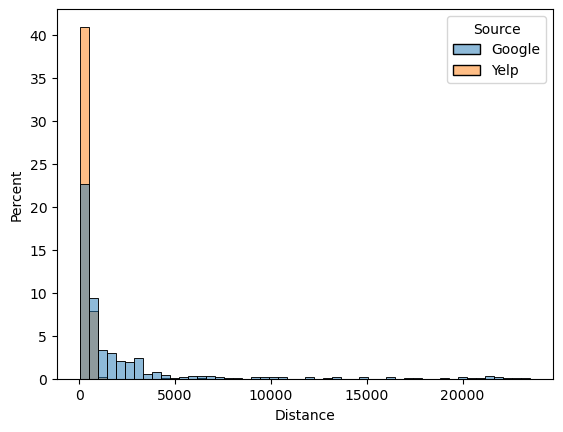

In [108]:
# Identifying distance outliers with a histogram
sns.histplot(data = cleaned_venues, x = 'Distance', stat = 'percent', hue = cleaned_venues['Source'], bins = 50)

In [109]:
# Removing venues with extreme distance outliers
cleaned_venues = cleaned_venues[cleaned_venues['Distance'] < 3250]
cleaned_venues

,Venue Name,Average Rating,Review Count,SkyTrain Station,Latitude,Longitude,ID,Source,Distance
0,A&W Canada,3.7,569,Main Street-Science World,49.273120,-123.100480,ChIJZ7GEH2RxhlQRVOFg4REEFN0,Google,11.062798
1,A&W Canada,3.8,765,Commercial-Broadway Station,49.262566,-123.069420,ChIJvWqz0E5xhlQRmQ0QSFzd-OI,Google,14.740644
2,Tim Hortons,3.2,138,Main Street-Science World,49.273150,-123.100556,ChIJydBOH2RxhlQRNt7Hp4vijHE,Google,15.113673
3,St Regis Bar & Grill,4.1,672,Granville,49.283169,-123.115932,ChIJAWJHy3hxhlQRxAZ-J4oMWJA,Google,20.001128
4,The Keg Steakhouse + Bar - Dunsmuir,4.4,2288,Granville,49.283445,-123.116359,ChIJGdCptHhxhlQR5OKcIP64od4,Google,23.592278
...,...,...,...,...,...,...,...,...,...
1389,Sing Sing Restaurant,3.5,3,Nanaimo Station,49.244021,-123.062428,g9izr4byoZaLZlxTqTCslA,Yelp,668.908614
1390,Thai Cook Thai,3.0,1,Nanaimo Station,49.244021,-123.062428,bOL6FAusls9zEyYq1ITaJg,Yelp,668.908614
1391,Sushi Street,5.0,4,King George,49.190440,-122.850100,9XbqS8TN_GqMWjshzHev0A,Yelp,933.788753
1392,Church's Texas Chicken,2.5,3,Sea Island Centre,49.194544,-123.174736,E2ce43D0uCJ33rca3fTBZA,Yelp,1235.408371


<Axes: xlabel='Distance', ylabel='Percent'>

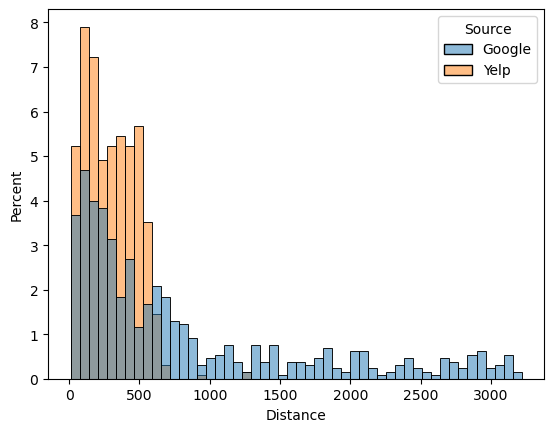

In [110]:
# Checking the new distribution. Could be narrowed down more, but certainly an improvement.
sns.histplot(data = cleaned_venues, x = 'Distance', stat = 'percent', hue = cleaned_venues['Source'], bins = 50)

In [111]:
#Export combined and cleaned data to .csv file
cleaned_venues.to_csv('../API_Data/cleaned_venues.csv')